# Introduction

In [1]:
## Chip Technical Assessment - Insight Analyst
# Authored by Alex Whelan
'''
Data .csv contains subset of users and relevant info

Key

•	User_id : Unique identifier of the user
•	Total_saved_ever : Total amount of money in £ saved by a given user
•	No_of_manual+auto_saves : Total number of manual and auto saves by a given user
•	No_withdrawals : Total number of withdrawals
•	No_auto_saves : Total number of auto saves
•	No_manual_saves : Total number of manual saves
•	No_of_cancelled_autosaves : Total number of cancelled auto saves
•	Days_active : Total number of days the user has been active

Objective: Generate useful insights from the data

Suggestions
•	Use charts to visualise results, where possible
•	Generate an interesting insight for each key
•	Generate mece user personas
•	Automate process where possible
•	Document your thought process and any assumptions that you’ve made
'''

In [2]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Preliminary Checks
Here we can see the first 5 rows of the data table. It looks to be arranged from least to most 'total saved'. 
We can see that there are 10,000 users in the dataset and 7 different attributes ('user ID' will not be useful at this stage). 
All the data types are integers, with the exception of 'total saved', which is a float. 
Finally, there are no null values in the data.

In [3]:
# import data and preliminary checks

data = pd.read_csv('cluster_interview_test.csv')
print(data.head())
print(data.shape)
print(data.dtypes)
print(data.isnull().sum())

                      user_id  total_saved_ever  no_of_manual+auto_saves  \
0  5804b63657135c14008b461f12               0.0                        0   
1  5815d07a84ab2011338b457764               0.0                        0   
2  586959e3a78c4b520e8b464626               0.0                        0   
3  58a6c4e1498b23c9028b45e668               0.0                        0   
4  58edfc494d19ee1c0000028627               0.0                        0   

   no_withdrawals  no_auto_saves  no_manual_saves  no_of_cancelled_autosaves  \
0               0              0                0                          0   
1               0              0                0                          8   
2               0              0                0                          2   
3               0              0                0                          6   
4               0              0                0                          2   

   days_active  
0          365  
1          404  
2          

## Descriptive Statistics
The table below shows some brief summarising statistics for each column of the data. 
We can see that the mean total saved is 1317.36, and it has a very high std dev., which seems correct as the max total saved is 21066.09, considerably higher than the mean. This shows the total saved column has a high variation, some users save a lot while others do not. 
Users save this amount via saves, and we can see on average they save 51 times. This already allows us to work out an average amount per save of roughly 26. However there is likely to be a lot of deviation here as the amount saved varies so much. 
Users seems to withdraw very little, with an average of only 10 withdrawals. However again there is high variance, with one outlier making 90 withdrawals. 
It would seem most users prefer to autosave than do it manually, as the proportion of autosaves to manual saves is higher. 
The mean number of cancels is 5, but yet again the data is spread out with the max number of cancels being 186. 
Finally, users range in days active from 8 to 1086 (almost 3 years), with the mean around 464 days.

In [4]:
# first exploratory description and summary of variables

print(data.describe())

       total_saved_ever  no_of_manual+auto_saves  no_withdrawals  \
count      10000.000000              10000.00000    10000.000000   
mean        1317.363305                 50.65630        9.675100   
std         1962.265495                 35.89763        9.399477   
min            0.000000                  0.00000        0.000000   
25%          249.607500                 20.00000        3.000000   
50%          728.480000                 48.00000        7.000000   
75%         1515.972500                 74.00000       14.000000   
max        21066.090000                233.00000       90.000000   

       no_auto_saves  no_manual_saves  no_of_cancelled_autosaves   days_active  
count   10000.000000     10000.000000               10000.000000  10000.000000  
mean       44.877200         5.779100                   5.488300    464.152400  
std        30.610548        13.925318                   9.226157    216.698309  
min         0.000000         0.000000                   0.00000

# Analysis of Variables

## Total Amount Saved
The figure below shows one of the most important data columns: the total amount saved by each user, grouped into £1k bins. The 0-1000 bin is by far the biggest, with over 6000 users saving this amount. After this the user count decays exponentially with increasing total amount saved. 

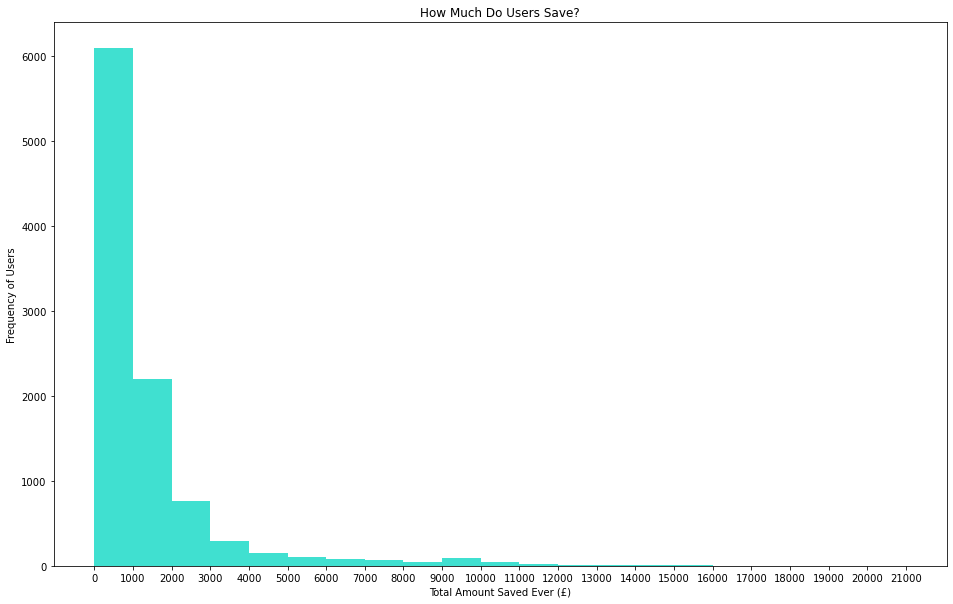

In [5]:
# analysis of variables #1: total_saved
# total_Saved = histogram/how much do they save?

plt.figure(figsize=(16,10))
plot_data = data['total_saved_ever']
bins = range(int(plot_data.min()), int(plot_data.max()), 1000)

plt.hist(plot_data, bins = bins, color = 'turquoise')
plt.title('How Much Do Users Save?')
plt.xlabel('Total Amount Saved Ever (£)')
plt.ylabel('Frequency of Users')
plt.xticks(bins);

## Total Number of Saves
Below we can see that more users tend to have a lower total number of saves. The 0-10 bin is likely over-represented due to a number of users having zero saves and maintaining a non-active account.The second plot shows that total saves have a positive correlation with total amount saved. While this may seem trivial and obvious, it's a good sanity check for the data. If we saw a negative or no correlation here it would raise a number of questions. It's also interesting to note that as we reach higher numbers of saves the total amount saved seems to increase in variance. This may be explained by some users being able to afford to save more, but being active for fewer days, while other users only being able to save a little but being active for a long time. 

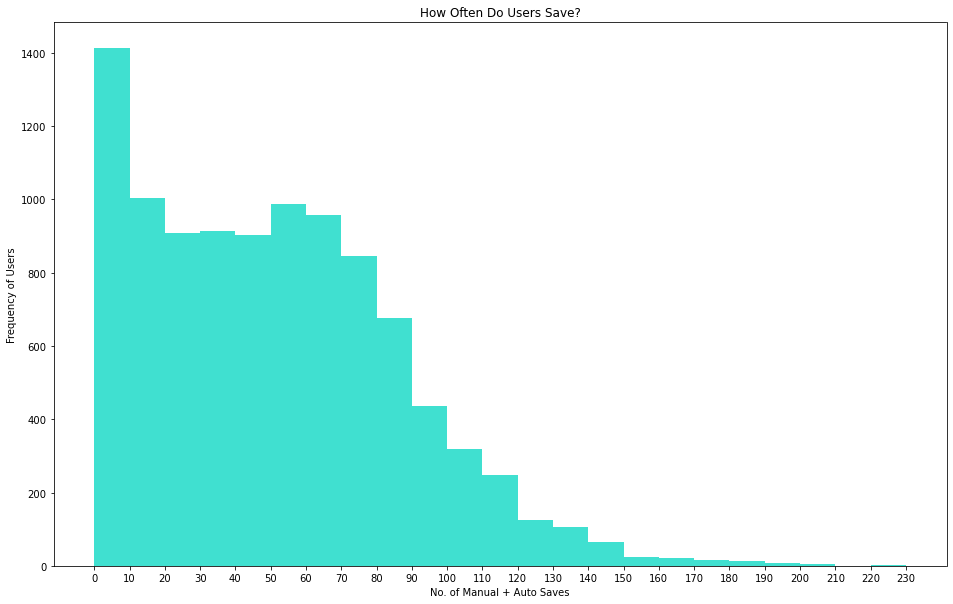

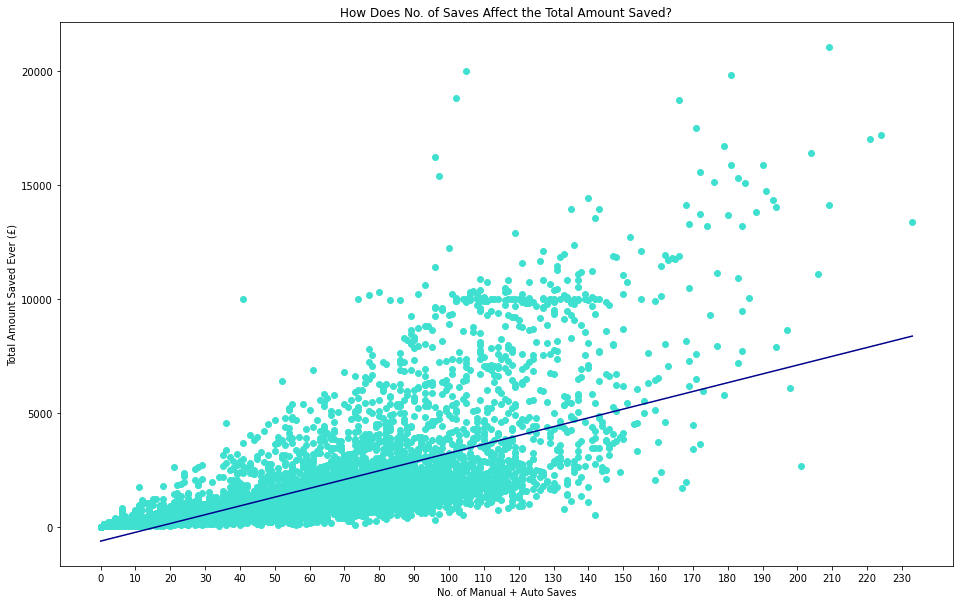

In [6]:
# analysis of variables #2: no of total saves
# man+autosaves = + total saved (so more with more saves?)

plt.figure(figsize=(16,10))
plot_data2 = data['no_of_manual+auto_saves']
bins = range(int(plot_data2.min()), int(plot_data2.max()), 10)

plt.hist(plot_data2, bins = bins, color = 'turquoise')
plt.title('How Often Do Users Save?')
plt.xlabel('No. of Manual + Auto Saves')
plt.ylabel('Frequency of Users')
plt.xticks(bins);

plt.figure(figsize=(16,10))
plt.scatter(plot_data2, plot_data, color = 'turquoise')
plt.title('How Does No. of Saves Affect the Total Amount Saved?')
plt.xlabel('No. of Manual + Auto Saves')
plt.ylabel('Total Amount Saved Ever (£)')
plt.xticks(bins);
plt.plot(np.unique(plot_data2), np.poly1d(np.polyfit(plot_data2, plot_data, 1))(np.unique(plot_data2)), 'darkblue');

## Withdrawals
Here we can see that withdrawals again follows a similiar trend to other data columns. A negative exponential decay with most users having fewer withdrawals. This makes intuitive sense as the service is designed for saving rather than withdrawing money. I was interested to see if withdrawals had any correlation with total amount saved, and although there is a slight positive correlation, most of the data points seem too far way from this for it to be significant (a statistical test would be needed to confirm this however). 

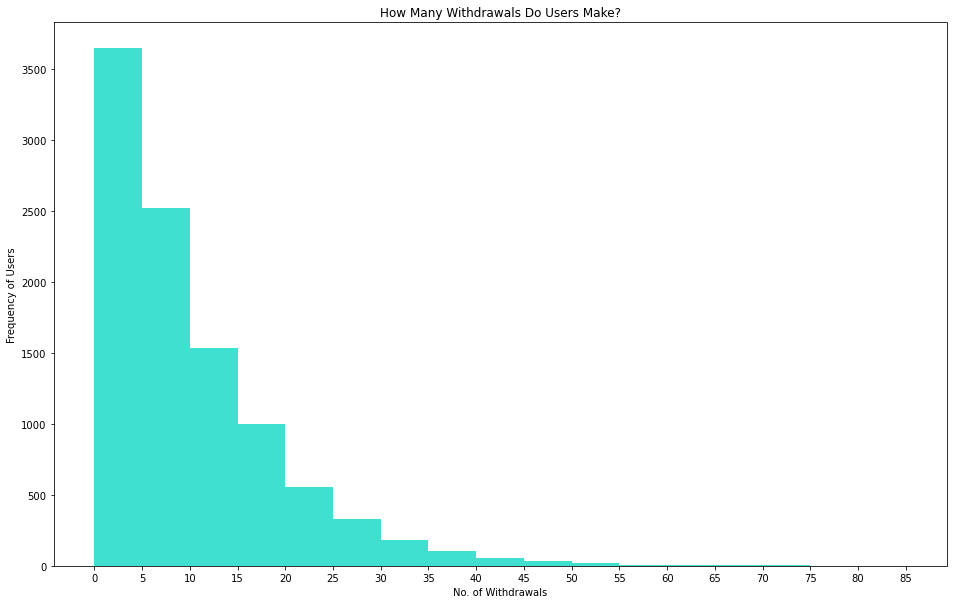

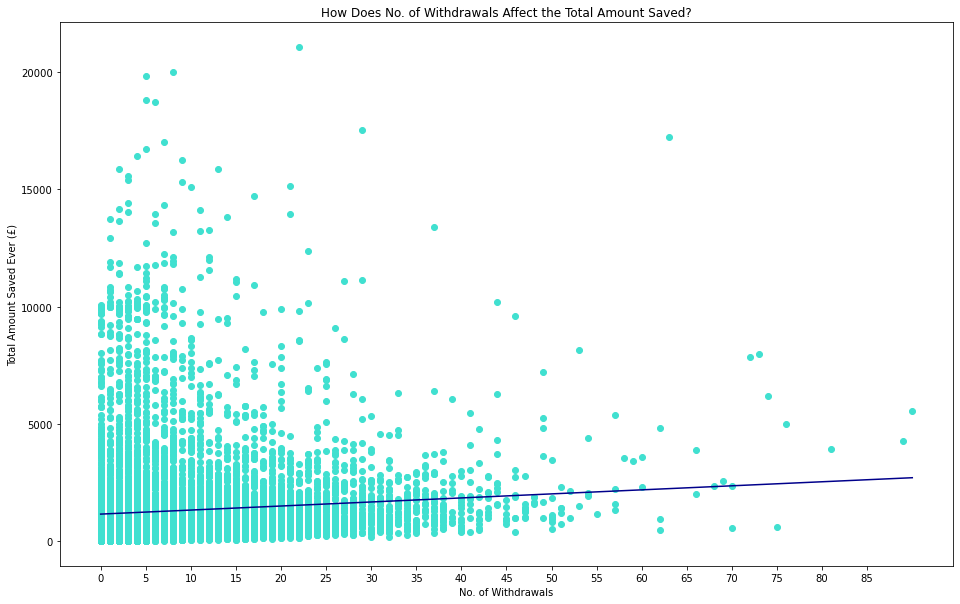

In [7]:
# analysis of variables #3: withdrawals
# withdrawals = + total saved (more withdrawals mean less saved?)

plt.figure(figsize=(16,10))
plot_data3 = data['no_withdrawals']
bins = range(int(plot_data3.min()), int(plot_data3.max()), 5)

plt.hist(plot_data3, bins = bins, color = 'turquoise')
plt.title('How Many Withdrawals Do Users Make?')
plt.xlabel('No. of Withdrawals')
plt.ylabel('Frequency of Users')
plt.xticks(bins);

plt.figure(figsize=(16,10))
plt.scatter(plot_data3, plot_data, color = 'turquoise')
plt.title('How Does No. of Withdrawals Affect the Total Amount Saved?')
plt.xlabel('No. of Withdrawals')
plt.ylabel('Total Amount Saved Ever (£)')
plt.xticks(bins);
plt.plot(np.unique(plot_data3), np.poly1d(np.polyfit(plot_data3, plot_data, 1))(np.unique(plot_data3)), 'darkblue');

## Autosaves
This pie chart demonstrates that most saves done via Chip are done automatically and only 11.4% are done manually. As this is a main feature of the platform and an attractive proposition for users it would make sense for this to be the case.

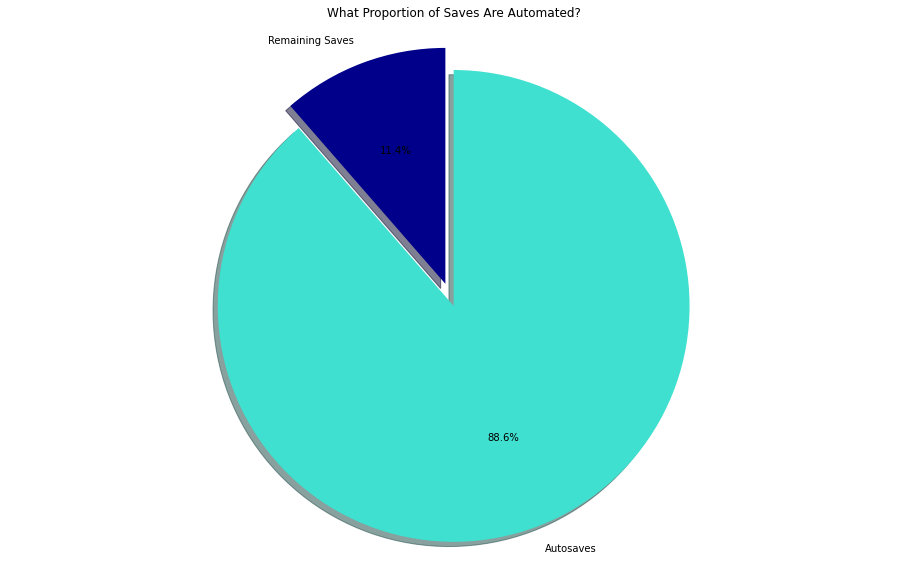

In [8]:
# analysis of variables #4: autosaves
#auto_saves = as proportion of total saves (what kind of saves are they doing?)

plt.figure(figsize=(16,10))
plot_data4 = data['no_auto_saves']

plt.pie([plot_data2.sum()-plot_data4.sum(), plot_data4.sum()], explode = (0.1, 0), labels = ['Remaining Saves', 'Autosaves'], autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['darkblue', 'turquoise']);
plt.axis('equal')
plt.title('What Proportion of Saves Are Automated?');

## Manual Saves
The scatter plot below shows that as the number of manual saves increases, so does the total amount saved. This may reveal an interesting subset of users that prefer to have more control over their finances, and therefore are likely to save more. To test this properly I have computed the proportion of manual to autosaves for each user, and it reveals that there is a slight positive correlation between the proportion of manual saves and how much is saved. However the correlation is much weaker than the previous graph indicated, likely showing that the correlation we saw was mostly due to more saves = more saved. 

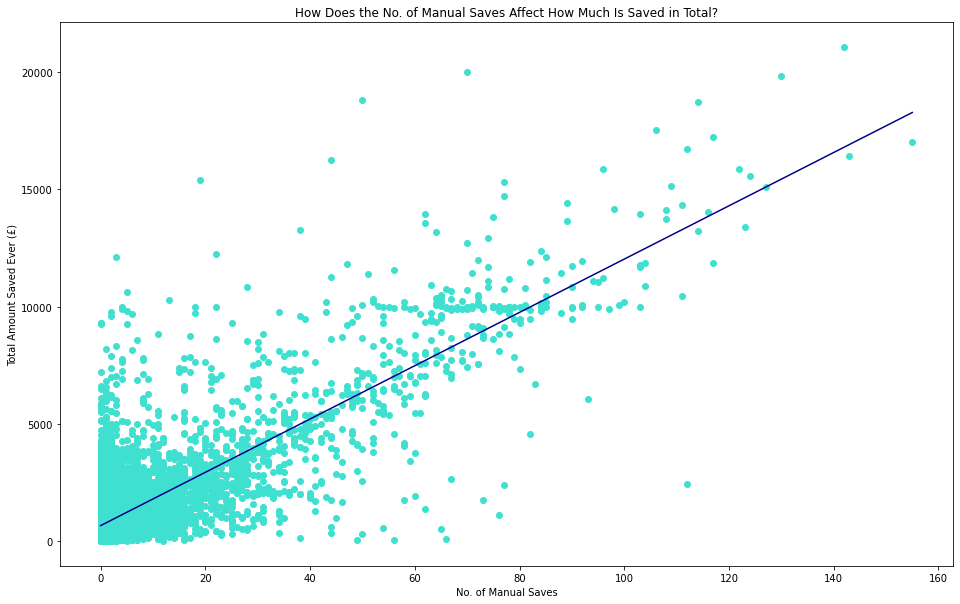

In [9]:
# analysis of variables #5: manual saves
#manual saves = do more manual saves mean more saved?

plt.figure(figsize=(16,10))
plot_data5 = data['no_manual_saves']

plt.scatter(plot_data5, plot_data, color = 'turquoise')
plt.title('How Does the No. of Manual Saves Affect How Much Is Saved in Total?')
plt.xlabel('No. of Manual Saves')
plt.ylabel('Total Amount Saved Ever (£)')
#plt.xticks(bins);
plt.plot(np.unique(plot_data5), np.poly1d(np.polyfit(plot_data5, plot_data, 1))(np.unique(plot_data5)), 'darkblue');

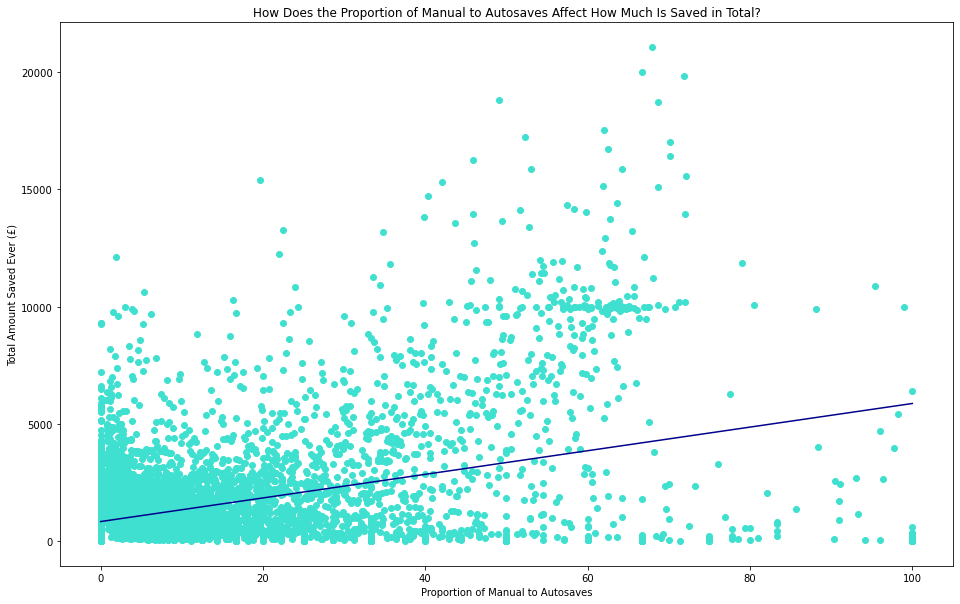

In [10]:
# compute the proportion of manual to auto saves as a percentage
data['prop_man_auto'] = data['no_manual_saves']/data['no_of_manual+auto_saves']*100
plot_data8 = data['prop_man_auto'].fillna(0)

plt.figure(figsize=(16,10))
plt.scatter(plot_data8, plot_data, color = 'turquoise')
plt.title('How Does the Proportion of Manual to Autosaves Affect How Much Is Saved in Total?')
plt.xlabel('Proportion of Manual to Autosaves')
plt.ylabel('Total Amount Saved Ever (£)')
#plt.xticks(bins);
plt.plot(np.unique(plot_data8), np.poly1d(np.polyfit(plot_data8, plot_data, 1))(np.unique(plot_data8)), 'darkblue');

## Cancelled Saves
Here we can see that the number of cancelled saves does not correlate very well with total amount saved. There is a slight negative correlation, suggesting that less cancelled saves means a user saves more, which would make logical sense. Most users seem to cancel very little.

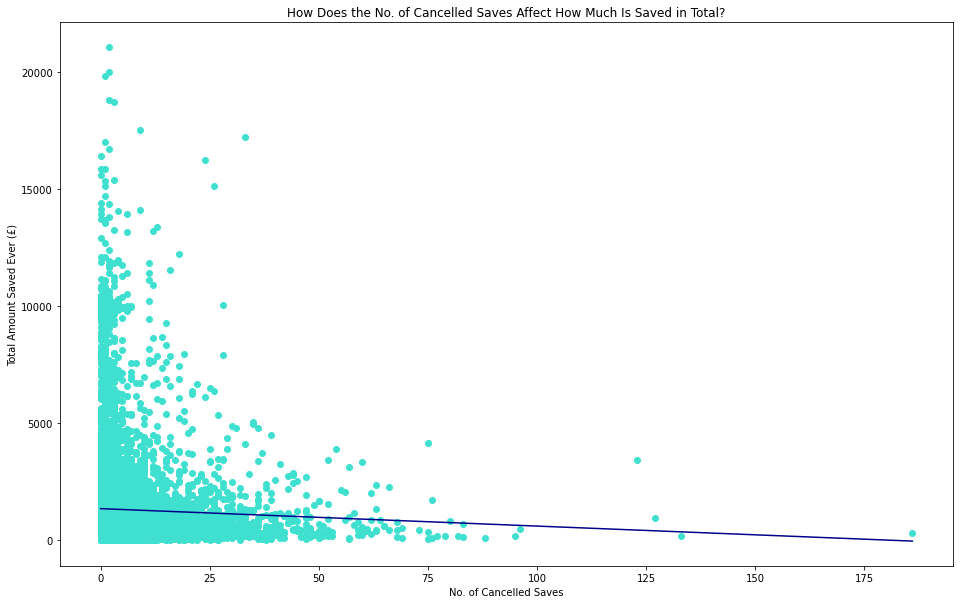

In [11]:
# analysis of variables #6: cancelled autosaves
#cancelled saves = how much do people save before they cancel?

plt.figure(figsize=(16,10))
plot_data6 = data['no_of_cancelled_autosaves']

plt.scatter(plot_data6, plot_data, color = 'turquoise')
plt.title('How Does the No. of Cancelled Saves Affect How Much Is Saved in Total?')
plt.xlabel('No. of Cancelled Saves')
plt.ylabel('Total Amount Saved Ever (£)')
#plt.xticks(bins);
plt.plot(np.unique(plot_data6), np.poly1d(np.polyfit(plot_data6, plot_data, 1))(np.unique(plot_data6)), 'darkblue');

## Days Active
The final column, days active, reveals a positive correlation with total amount saved. The longer a user has been using the platform, the more they have saved. Again there is high variance here, many users have been active for comparatively long but haven't saved much, and vice versa. 

A much stronger correlation is seen between the number of days a user has been active and how many saves they have made. This highlights the disconnect between number of saves and total amount saved. Some users do not save much with each individual save, while others do.

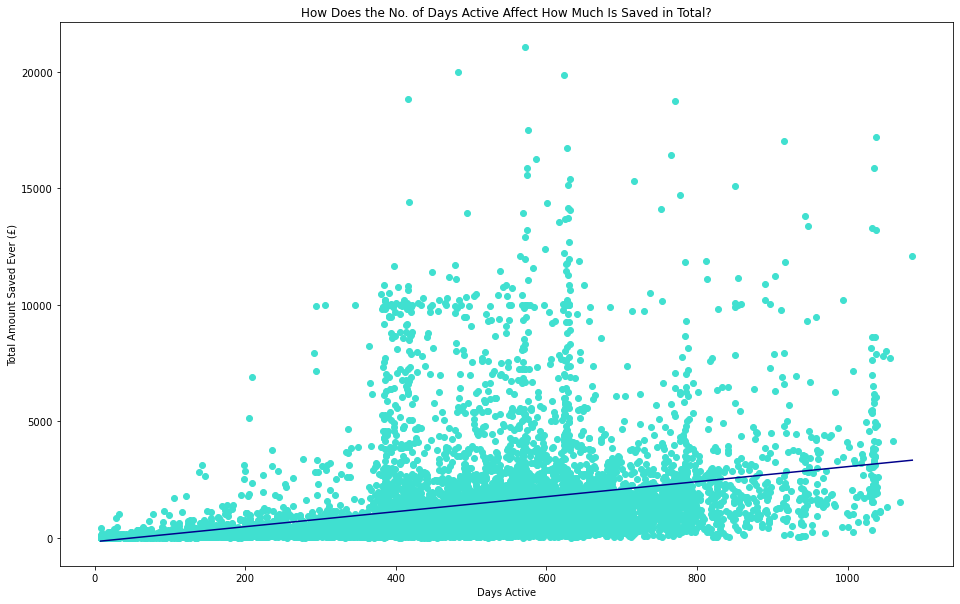

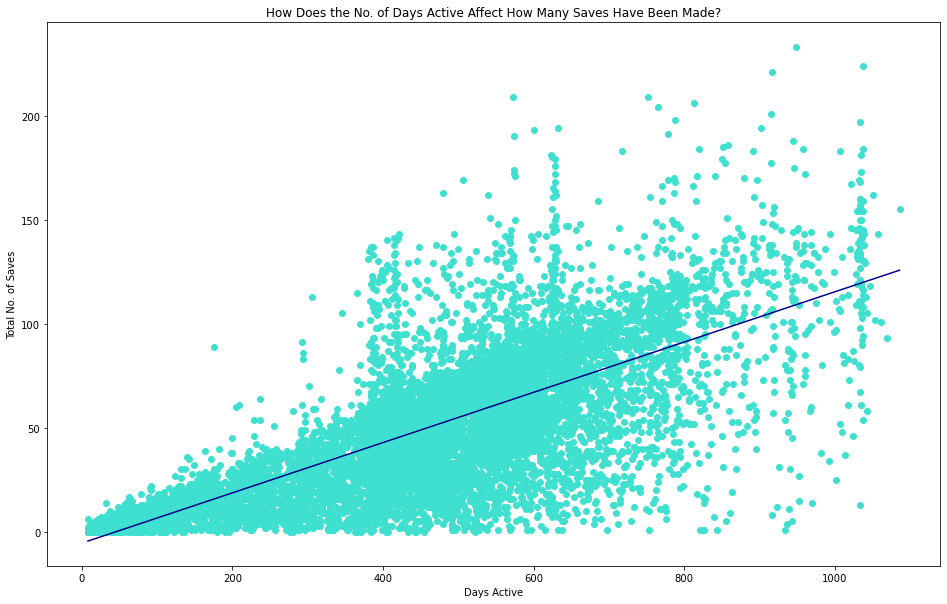

In [12]:
# analysis of variables #7: days active
#days active = longer active = more saved? OR do people cancel more saves the longer active? 

plt.figure(figsize=(16,10))
plot_data7 = data['days_active']

plt.scatter(plot_data7, plot_data, color = 'turquoise')
plt.title('How Does the No. of Days Active Affect How Much Is Saved in Total?')
plt.xlabel('Days Active')
plt.ylabel('Total Amount Saved Ever (£)')
#plt.xticks(bins);
plt.plot(np.unique(plot_data7), np.poly1d(np.polyfit(plot_data7, plot_data, 1))(np.unique(plot_data7)), 'darkblue');

plt.figure(figsize=(16,10))
plt.scatter(plot_data7, plot_data2, color = 'turquoise')
plt.title('How Does the No. of Days Active Affect How Many Saves Have Been Made?')
plt.xlabel('Days Active')
plt.ylabel('Total No. of Saves')
#plt.xticks(bins);
plt.plot(np.unique(plot_data7), np.poly1d(np.polyfit(plot_data7, plot_data2, 1))(np.unique(plot_data7)), 'darkblue');

# User Clustering

## Generating User Clusters Using K-Means
Below is a quick example of a machine learning algorithm, K-Means, that generates clusters of users which are similiar to each other, while maximising differences between clusters. Two columns were chosen as the most significant, total amount saved and days active, in order to reveal more insights into how users behave on the platform. 
The results show that, with 4 clusters chosen, we have 4 groups. The first group (cluster 1) saves very little regardless of how long they have been active. This group includes new users to the platform. The second group are those that save slightly more than the average amount and have been active for at least ~100 days. The third group have been active slightly longer, and saved around 3000-7000. The final group are the high savers, with 7k+ saved.
This self-supervised clustering shows that the most meaningful split in the data is in amount saved. There are clearly different groups of users, some of which save very little and some that save a lot. identifying further characteristics of the low-saving group, along with reasons for why they don't save as much, may allow for changes and development of the platform to increase engagement within this group. 

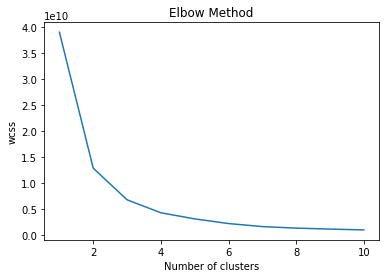

In [13]:
# user mece personas / clustering

from sklearn.cluster import KMeans

wcss = []
data = data[['total_saved_ever', 'days_active']]
data = data.values

for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(data)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

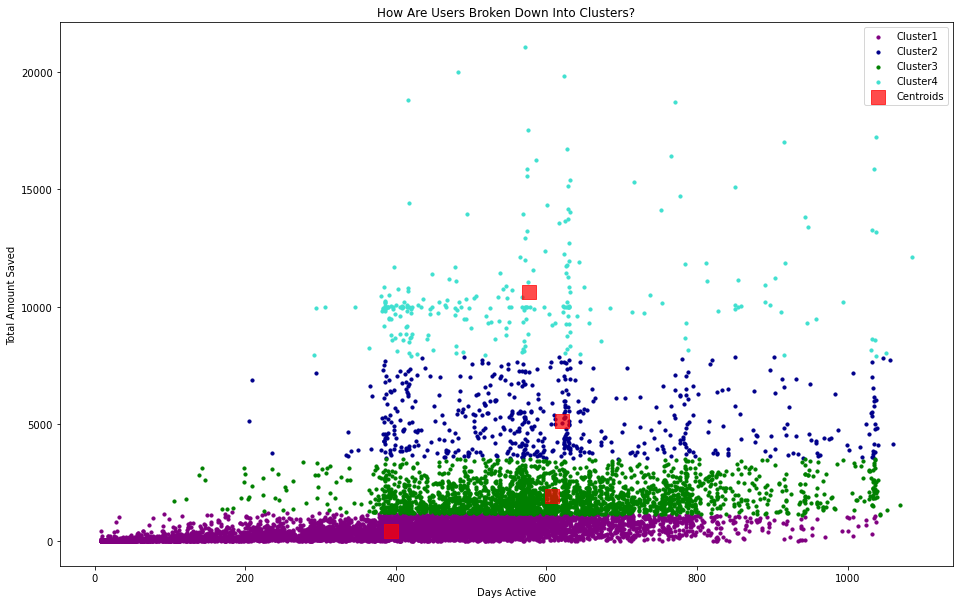

In [14]:
# Fitting kmeans to the dataset with k=4

km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(data)

# visualizing the clusters for k=4

plt.figure(figsize=(16,10))
plt.scatter(data[y_means==0,1],data[y_means==0,0],s=10, c='purple',label='Cluster1')
plt.scatter(data[y_means==1,1],data[y_means==1,0],s=10, c='darkblue',label='Cluster2')
plt.scatter(data[y_means==2,1],data[y_means==2,0],s=10, c='green',label='Cluster3')
plt.scatter(data[y_means==3,1],data[y_means==3,0],s=10, c='turquoise',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,1], km4.cluster_centers_[:,0],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('How Are Users Broken Down Into Clusters?')
plt.xlabel('Days Active')
plt.ylabel('Total Amount Saved')
plt.legend()
plt.show()